# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 1/28/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 1/28/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1060,38928341,2.7
Albania,8819,2877800,306.4
Algeria,3229,43851043,7.4
Andorra,833,77265,1078.1
Angola,993,32866268,3.0
Antigua and Barbuda,31,97928,31.7
Argentina,122477,45195777,271.0
Armenia,2697,2963234,91.0
Australia,110,25459700,0.4


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Portugal,156914,10196707,1538.9
Israel,93846,8655541,1084.2
Andorra,833,77265,1078.1
Spain,452837,46754783,968.5
Montenegro,5558,628062,884.9
Czechia,90055,10708982,840.9
Slovenia,16219,2078932,780.2
Lebanon,49871,6825442,730.7
Monaco,261,39244,665.1


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

1/24/21    2147769.0
1/25/21    2154656.0
1/26/21    2164043.0
1/27/21    2179679.0
1/28/21    2194562.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

1/15/21        NaN
1/16/21    14817.0
1/17/21    11484.0
1/18/21     9253.0
1/19/21    12233.0
1/20/21    29003.0
1/21/21     8277.0
1/22/21    16366.0
1/23/21    12430.0
1/24/21    10078.0
1/25/21     6887.0
1/26/21     9387.0
1/27/21    15636.0
1/28/21    14883.0
Name: Germany, dtype: float64

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


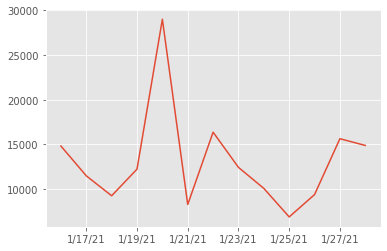

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

203.77889821253942